In [2]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [3]:
all_df = pd.read_csv("data/data2.csv")

In [4]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [5]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [7]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(SimpleRNN(units=70, input_shape=(70,1)))

In [11]:
model.add(Dense(1, activation = "sigmoid"))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 70)                5040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 5,111
Trainable params: 5,111
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70596 samples, validate on 7845 samples
Epoch 1/60
70596/70596 [==============================] - 31s 444us/step - loss: 0.6851 - acc: 0.5537 - val_loss: 0.6816 - val_acc: 0.5623
Epoch 2/60
70596/70596 [==============================] - 34s 485us/step - loss: 0.6766 - acc: 0.5745 - val_loss: 0.6771 - val_acc: 0.5759
Epoch 3/60
70596/70596 [==============================] - 24s 333us/step - loss: 0.6713 - acc: 0.5851 - val_loss: 0.6770 - val_acc: 0.5792
Epoch 4/60
70596/70596 [==============================] - 24s 335us/step - loss: 0.6662 - acc: 0.5948 - val_loss: 0.6714 - val_acc: 0.5822
Epoch 5/60
70596/70596 [==============================] - 24s 333us/step - loss: 0.6643 - acc: 0.5988 - val_loss: 0.6801 - val_acc: 0.5757
Epoch 6/60
70596/70596 [==============================] - 24s 335us/step - loss: 0.6636 - acc: 0.6003 - val_loss: 0.6786 - val_acc: 0.5800


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

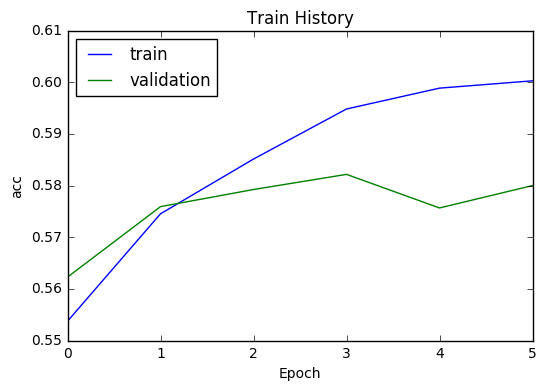

In [16]:
show_train_history(train_history,'acc','val_acc')

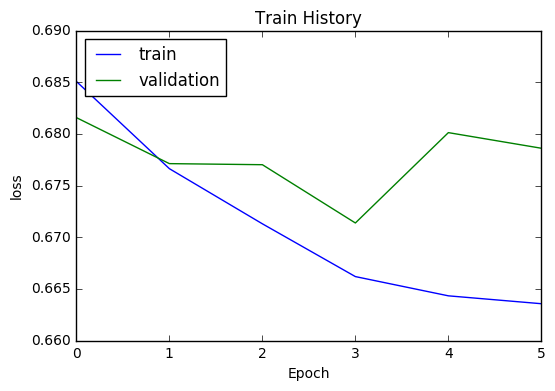

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 8s 408us/step


In [19]:
scores[1]

0.5692723471369118